In [106]:
import pandas as pd

# **Calculating Joint Distributions of Returns from APPLE and MICROSOFT from the last 5 years**

In [107]:
aapl = pd.read_csv('/content/drive/My Drive/AAPL_data.csv')
msft = pd.read_csv('/content/drive/My Drive/MSFT_data.csv')

In [108]:
msft.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1248,2024-09-09,407.239990,408.649994,402.149994,405.720001,405.720001,15295100
1249,2024-09-10,408.200012,416.329987,407.700012,414.200012,414.200012,19594300
1250,2024-09-11,415.500000,423.989990,409.579987,423.040009,423.040009,19266900
1251,2024-09-12,423.309998,427.369995,419.750000,427.000000,427.000000,17418800
1252,2024-09-13,425.829987,431.829987,425.459991,430.589996,430.589996,15874600
1253,2024-09-16,430.600006,433.529999,428.220001,431.339996,431.339996,13834700
1254,2024-09-17,440.230011,441.850006,432.269989,435.149994,435.149994,18874200
1255,2024-09-18,435.000000,436.029999,430.410004,430.809998,430.809998,18898000
1256,2024-09-19,441.230011,441.500000,436.899994,438.690002,438.690002,21706600
1257,2024-09-20,437.220001,439.209991,434.220001,435.269989,435.269989,53132905


**Last Closing Price was about $435 per share**

In [109]:
aapl.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1248,2024-09-09,220.820007,221.270004,216.710007,220.910004,220.910004,67180000
1249,2024-09-10,218.919998,221.479996,216.729996,220.110001,220.110001,51591000
1250,2024-09-11,221.460007,223.089996,217.889999,222.660004,222.660004,44587100
1251,2024-09-12,222.500000,223.550003,219.820007,222.770004,222.770004,37498200
1252,2024-09-13,223.580002,224.039993,221.910004,222.500000,222.500000,36766600
1253,2024-09-16,216.539993,217.220001,213.919998,216.320007,216.320007,59357400
1254,2024-09-17,215.750000,216.899994,214.500000,216.789993,216.789993,45519300
1255,2024-09-18,217.550003,222.710007,217.539993,220.690002,220.690002,59894900
1256,2024-09-19,224.990005,229.820007,224.630005,228.869995,228.869995,66781300
1257,2024-09-20,229.970001,233.089996,227.619995,228.199997,228.199997,287134033


**Last Closing Price was about $228 per share**

In [110]:
# Calculating Returns
aapl['Return'] = aapl['Adj Close'].pct_change()
msft['Return'] = msft['Adj Close'].pct_change()

aapl_returns  = aapl['Return'].dropna()
msft_returns = msft['Return'].dropna()

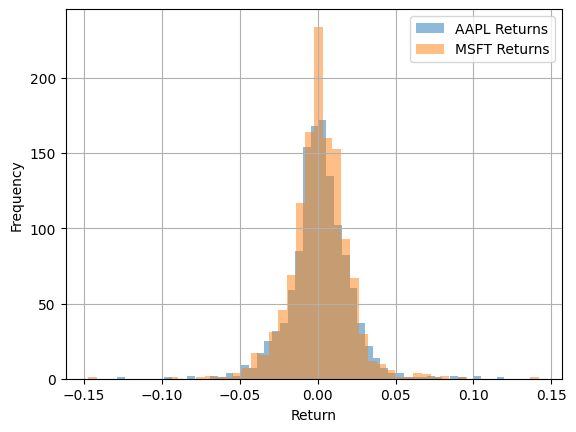

In [111]:
import matplotlib.pyplot as plt

# Histograms plotting the two returns
aapl_returns.hist(bins=50, alpha=0.5, label='AAPL Returns')
msft_returns.hist(bins=50, alpha=0.5, label='MSFT Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()

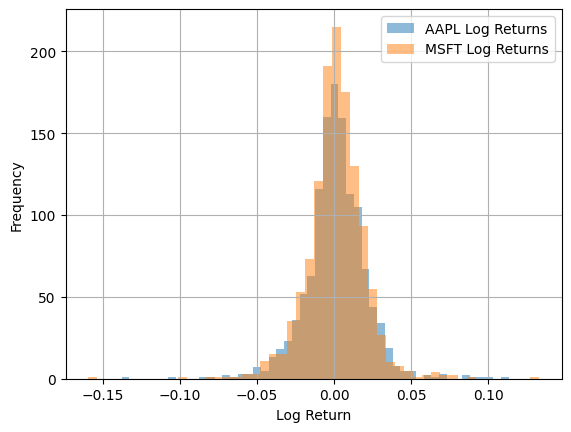

In [112]:
import numpy as np

# Log Distribution
aapl_log_returns = np.log(1 + aapl_returns)
msft_log_returns = np.log(1 + msft_returns)

aapl_log_returns.hist(bins=50, alpha=0.5, label='AAPL Log Returns')
msft_log_returns.hist(bins=50, alpha=0.5, label='MSFT Log Returns')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()

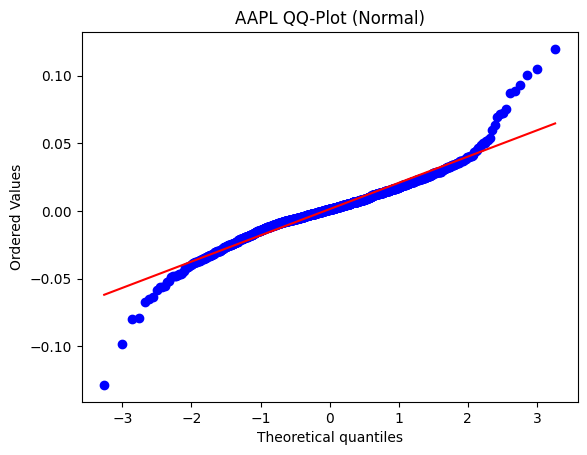

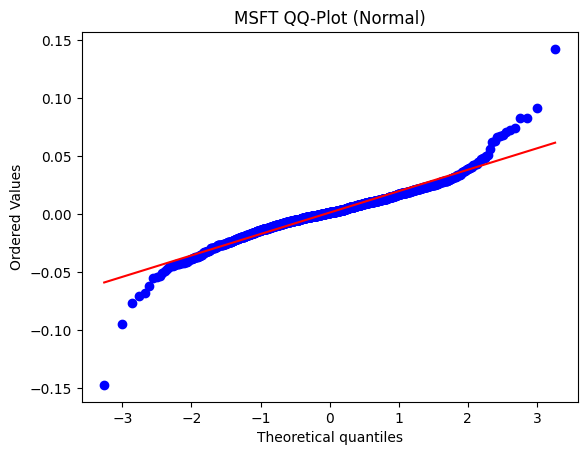

In [113]:
from scipy import stats
from scipy.stats import norm

mu_aapl,std_aapl = norm.fit(aapl_returns)
mu_msft,std_msft = norm.fit(msft_returns)

stats.probplot(aapl_returns, dist=stats.norm, plot=plt)
plt.title("AAPL QQ-Plot (Normal)")
plt.show()

print('')

stats.probplot(msft_returns, dist=stats.norm, plot=plt)
plt.title("MSFT QQ-Plot (Normal)")
plt.show()

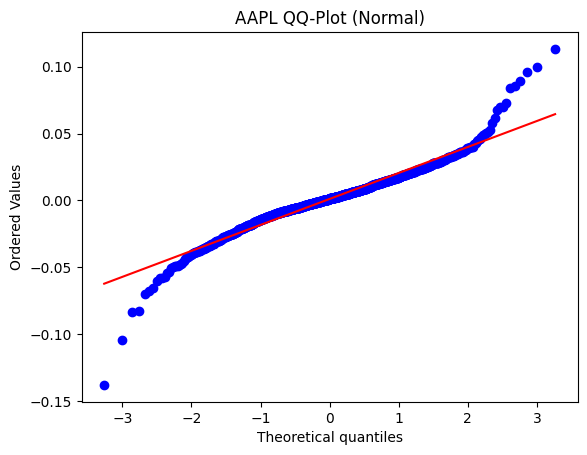

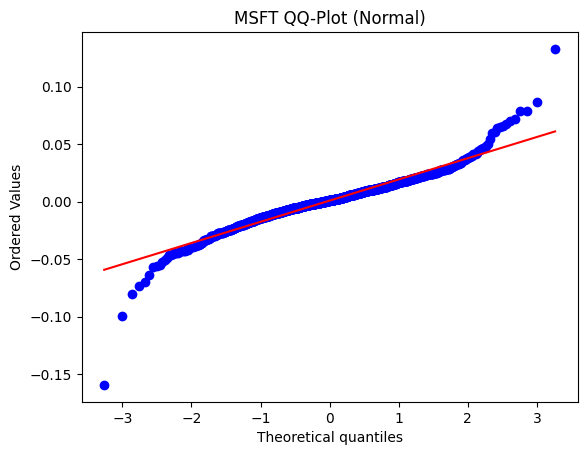

In [114]:
from scipy import stats
from scipy.stats import norm

mu_aapl,std_aapl = norm.fit(aapl_log_returns)
mu_msft,std_msft = norm.fit(msft_log_returns)


stats.probplot(aapl_log_returns, dist=stats.norm, plot=plt)
plt.title("AAPL QQ-Plot (Normal)")
plt.show()

print('')

stats.probplot(msft_log_returns, dist=stats.norm, plot=plt)
plt.title("MSFT QQ-Plot (Normal)")
plt.show()

In [115]:
from scipy.stats import kstest

# Test for normal distribution
ks_stat_aapl, p_value_aapl = kstest(aapl_log_returns, 'norm', args=(mu_aapl, std_aapl))
ks_stat_msft, p_value_msft = kstest(msft_log_returns, 'norm', args=(mu_msft,std_msft))

print(f"KS Test - AAPL Log Normal: statistic = {ks_stat_aapl}, p-value = {p_value_aapl}")
print(f"KS Test - MSFT  Log Normal: statistic = {ks_stat_msft}, p-value = {p_value_msft}")


KS Test - AAPL Log Normal: statistic = 0.0726020126999948, p-value = 3.3053359125363135e-06
KS Test - MSFT  Log Normal: statistic = 0.06614798219868495, p-value = 3.1676767588827955e-05


In [116]:
from scipy.stats import kstest

# Test for normal distribution
ks_stat_aapl, p_value_aapl = kstest(aapl_returns, 'norm', args=(mu_aapl, std_aapl))
ks_stat_msft, p_value_msft = kstest(msft_returns, 'norm', args=(mu_msft,std_msft))

print(f"KS Test - AAPL Normal: statistic = {ks_stat_aapl}, p-value = {p_value_aapl}")
print(f"KS Test - MSFT Normal: statistic = {ks_stat_msft}, p-value = {p_value_msft}")


KS Test - AAPL Normal: statistic = 0.07340560496003032, p-value = 2.4580819487658736e-06
KS Test - MSFT Normal: statistic = 0.06693813597845558, p-value = 2.4293551344497227e-05


In [117]:

import statsmodels.api as sm

def calculate_aic_bic(model):
    """Calculates AIC and BIC for a given statistical model."""
    aic = model.aic
    bic = model.bic
    return aic, bic

# Fit a linear regression model with AAPL returns as the independent variable and MSFT returns as the dependent variable
X = sm.add_constant(aapl_returns)  # Add a constant term for the intercept
model = sm.OLS(msft_returns, X).fit()

aic, bic = calculate_aic_bic(model)

print(f"AIC: {aic}")
print(f"BIC: {bic}")


AIC: -7413.401188966034
BIC: -7403.128222548854


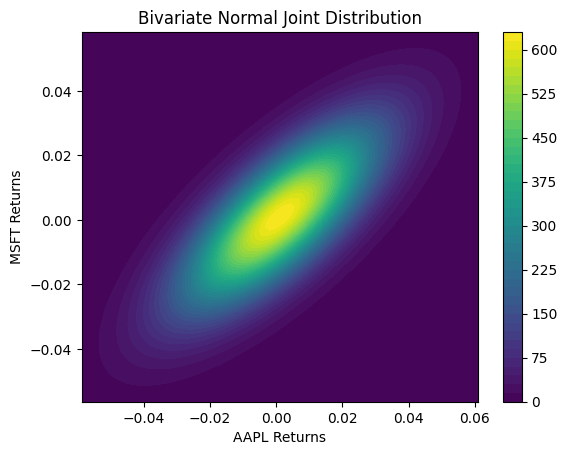

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Parameters (replace these with your calculated values)

correlation = aapl_returns.corr(msft_returns)

# Create a grid of points to evaluate the joint PDF
x = np.linspace(mu_aapl - 3*std_aapl, mu_aapl + 3*std_aapl, 100)
y = np.linspace(mu_msft - 3*std_msft, mu_msft + 3*std_msft, 100)
X, Y = np.meshgrid(x, y)

# Create the covariance matrix
covariance_matrix = np.array([[std_aapl**2, correlation * std_aapl * std_msft],
                               [correlation * std_aapl * std_msft, std_msft**2]])

# Create the bivariate normal distribution
rv = multivariate_normal(mean=[mu_aapl, mu_msft], cov=covariance_matrix)

# Evaluate the PDF over the grid
Z = rv.pdf(np.dstack((X, Y)))

# Plot the joint distribution
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar()
plt.xlabel('AAPL Returns')
plt.ylabel('MSFT Returns')
plt.title('Bivariate Normal Joint Distribution')
plt.show()


In [119]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal

window_size = 60  # Rolling window size
predictions = []

# Iterate through the DataFrame with a rolling window
for start in range(len(aapl_returns) - window_size):
    end = start + window_size
    window_data = aapl_returns.iloc[start:end]

    covariance_matrix = np.array([[std_aapl**2, correlation * std_aapl * std_msft],
                                   [correlation * std_aapl * std_msft, std_msft**2]])

    # Fit the bivariate normal distribution
    rv = multivariate_normal(mean=[mu_aapl, mu_msft], cov=covariance_matrix)

    # Generate predictions for the next day
    next_day_pred = rv.rvs(size=1)
    predictions.append(next_day_pred)

# Convert predictions to DataFrame
predictions_df = pd.DataFrame(predictions, columns=['Pred_AAPL', 'Pred_MSFT'])

# Concatenate with the original returns DataFrame for analysis
backtest_results = pd.concat([aapl_returns[window_size:].reset_index(drop=True), predictions_df], axis=1)


In [120]:
backtest_results

,Return,Pred_AAPL,Pred_MSFT
0,-0.002389,0.007032,0.011357
1,0.001001,-0.025450,-0.004548
2,-0.002071,0.027792,0.028250
3,0.016318,0.011235,0.000169
4,0.000951,-0.012181,-0.019175
...,...,...,...
1192,-0.027775,0.001666,0.013286
1193,0.002173,0.005423,0.011664
1194,0.017990,-0.017185,0.005898
1195,0.037066,-0.004579,-0.000680


In [121]:
from sklearn.metrics import mean_squared_error

# Calculate MSE for AAPL and MSFT
mse_aapl = mean_squared_error(backtest_results['Return'], backtest_results['Pred_AAPL'])
mse_msft = mean_squared_error(backtest_results['Return'], backtest_results['Pred_MSFT'])

print(f'MSE for AAPL: {mse_aapl}')
print(f'MSE for MSFT: {mse_msft}')

# Calculate correlation
corr_aapl = backtest_results['Return'].corr(backtest_results['Pred_AAPL'])
corr_msft = backtest_results['Return'].corr(backtest_results['Pred_MSFT'])

print(f'Correlation for AAPL: {corr_aapl}')
print(f'Correlation for MSFT: {corr_msft}')

MSE for AAPL: 0.0007822723016737126
MSE for MSFT: 0.0007755861931979394
Correlation for AAPL: 0.008410052299335322
Correlation for MSFT: -0.012693250930360353


# **Since MSFT and AAPL are not correlated, we dont expect much from the correlation calculations**

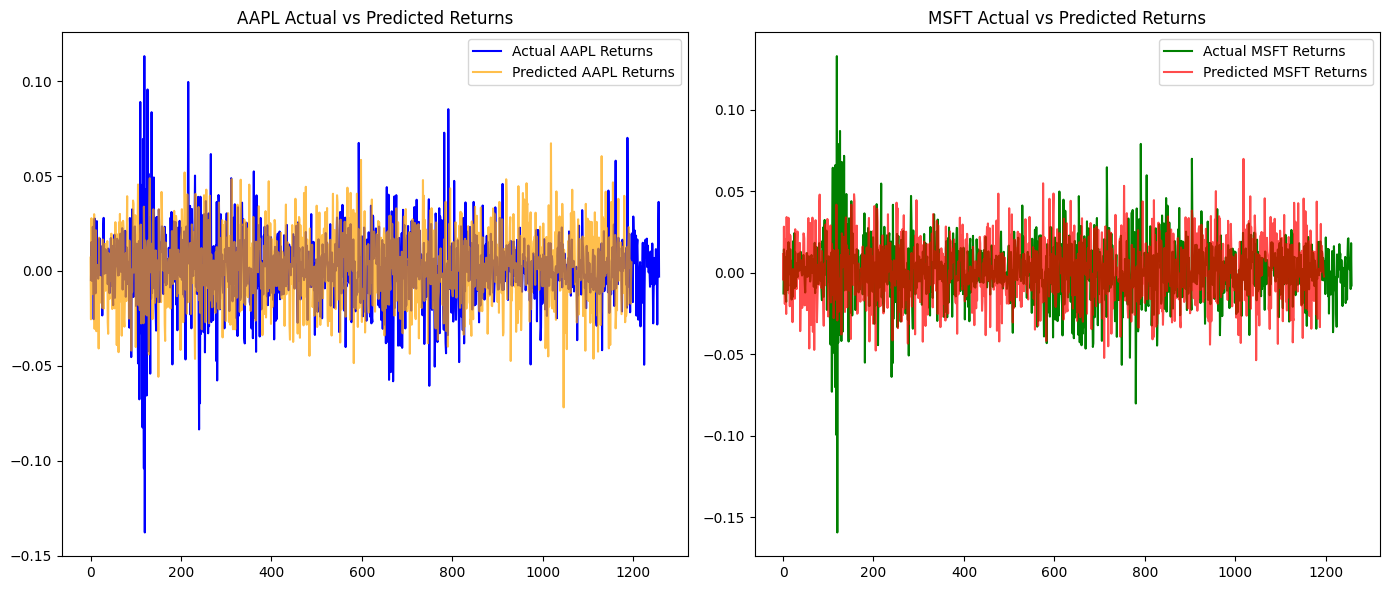

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# AAPL Returns
plt.subplot(1, 2, 1)
plt.plot(aapl_log_returns, label='Actual AAPL Returns', color='blue')
plt.plot(backtest_results['Pred_AAPL'], label='Predicted AAPL Returns', color='orange', alpha=0.7)
plt.title('AAPL Actual vs Predicted Returns')
plt.legend()

# MSFT Returns
plt.subplot(1, 2, 2)
plt.plot(msft_log_returns, label='Actual MSFT Returns', color='green')
plt.plot(backtest_results['Pred_MSFT'], label='Predicted MSFT Returns', color='red', alpha=0.7)
plt.title('MSFT Actual vs Predicted Returns')
plt.legend()

plt.tight_layout()
plt.show()
